# SwissRe Accident Risk Prediction

## Geospatial Data Visualization And Exploratory Data Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#!pip install contextily
import contextily as cx

## Reading Accident Dataset

In [2]:
accident_data_df = pd.read_csv('./resources/datasets/accident_lat_long_data.csv')
accident_data_df.shape

(198213, 44)

In [3]:
accident_data_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'building', 'house_number', 'road',
       'neighbourhood', 'suburb', 'city_district', 'city', 'state_district',
       'state', 'postcode', 'country'],
      dtype='object')

#### Converting Accident Dataframe to GeoDataFrame

In [4]:
accident_data_gdf = gpd.GeoDataFrame(accident_data_df, geometry=gpd.GeoSeries.from_xy(accident_data_df['Longitude'], accident_data_df['Latitude']), crs=4326)

####  Accident Point Map : Sample Geospatial Plot

<Axes: >

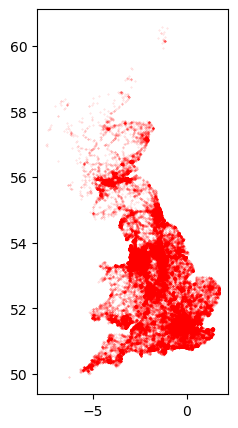

In [5]:
accident_data_gdf.plot(figsize = (5,5), alpha=0.2, marker='o', color='red', markersize=0.1)

### Accident Dataset: Adding a background map ( leveraging contextily )
adding web map tiles (Web Mercator-EPSG 3857) to this plot 

In [6]:
accident_data_gdf_wm = accident_data_gdf.to_crs(epsg=3857)

matplotlib.axes._axes.Axes

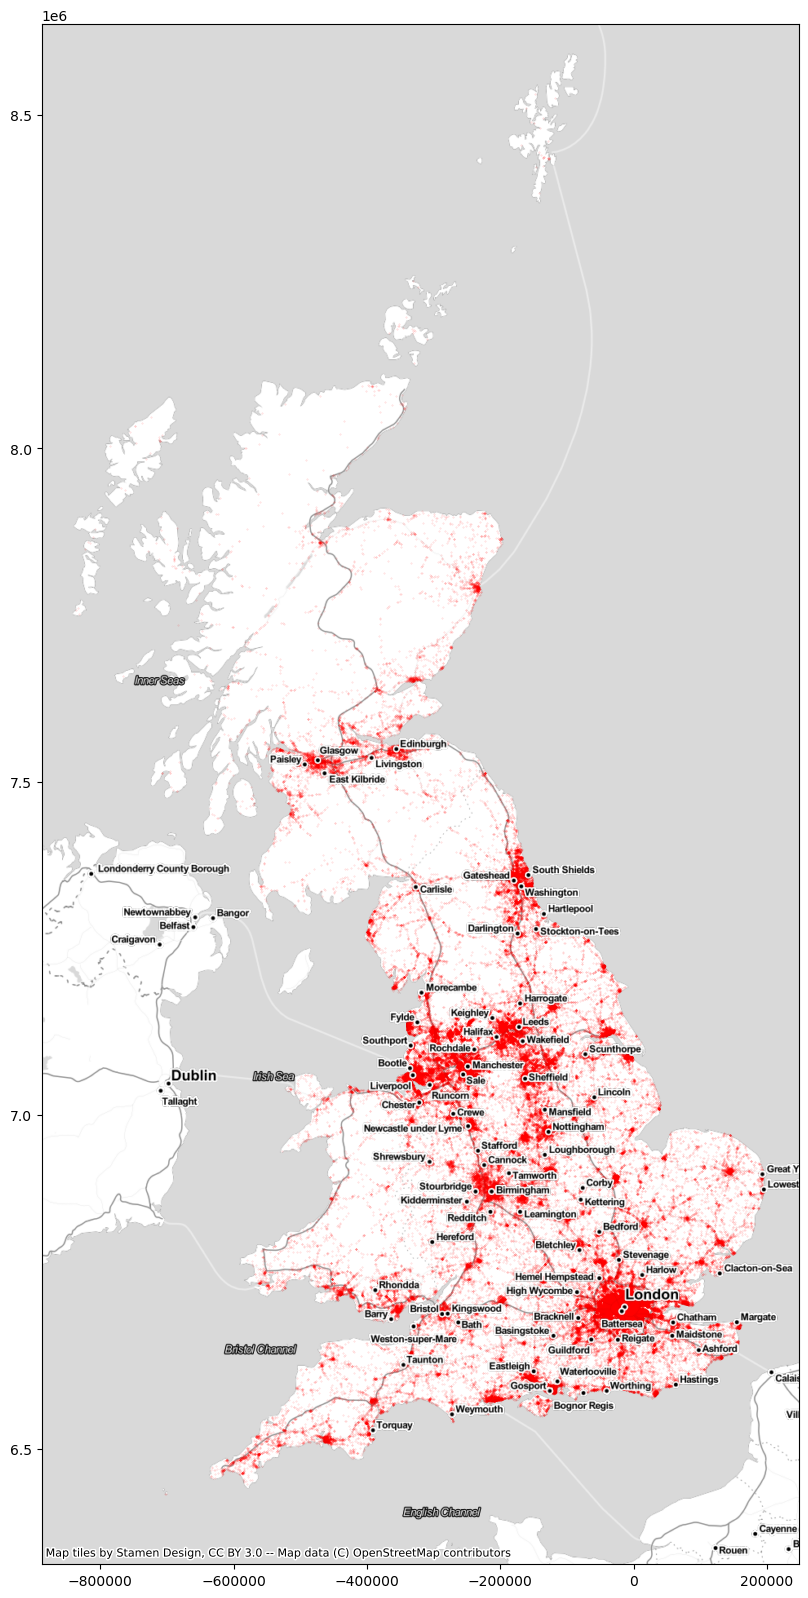

In [7]:
axis = accident_data_gdf_wm.plot(figsize = (20,20), alpha=0.2, marker='o', color='red', markersize=0.1)
display(type(axis))
cx.add_basemap(axis, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(axis, source=cx.providers.Stamen.TonerLabels)

## Reading Road Network Data

In [8]:
#Reading Road Network Shape File
road_network_gdf = gpd.read_file('./resources/datasets/major_road_network_2018_open_roads/Major_Road_Network_2018_Open_Roads.shp')

#### Road Network Data - Summary Statistics

In [9]:
display(type(road_network_gdf))
display(road_network_gdf.shape)

geopandas.geodataframe.GeoDataFrame

(62292, 24)

In [10]:
road_network_gdf.columns

Index(['fid_', 'id', 'endNode', 'startNode', 'roadNumber', 'roadNameTO',
       'fictitious', 'roadClassi', 'roadFuncti', 'formOfWay', 'length',
       'length_uom', 'loop', 'primaryRou', 'trunkRoad', 'roadClas_1', 'name1',
       'name1_lang', 'name2', 'name2_lang', 'roadStruct', 'geom_Lengt',
       'identifier', 'geometry'],
      dtype='object')

In [11]:
road_network_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62292 entries, 0 to 62291
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid_        62288 non-null  float64 
 1   id          62288 non-null  object  
 2   endNode     62288 non-null  object  
 3   startNode   62288 non-null  object  
 4   roadNumber  62288 non-null  object  
 5   roadNameTO  46554 non-null  object  
 6   fictitious  62288 non-null  float64 
 7   roadClassi  62288 non-null  object  
 8   roadFuncti  62288 non-null  object  
 9   formOfWay   62288 non-null  object  
 10  length      62288 non-null  float64 
 11  length_uom  62288 non-null  object  
 12  loop        62288 non-null  float64 
 13  primaryRou  62288 non-null  float64 
 14  trunkRoad   62288 non-null  float64 
 15  roadClas_1  62288 non-null  object  
 16  name1       46554 non-null  object  
 17  name1_lang  0 non-null      float64 
 18  name2       0 non-null      float64 
 

In [12]:
road_network_gdf.head()

,fid_,id,endNode,startNode,roadNumber,roadNameTO,fictitious,roadClassi,roadFuncti,formOfWay,...,trunkRoad,roadClas_1,name1,name1_lang,name2,name2_lang,roadStruct,geom_Lengt,identifier,geometry
0,0.0,id83DAD742-902E-40A4-94F1-01014A477BD0,id78290C31-7EAD-428E-80A4-3C5B0E8F7AD1,id3500BDA4-9041-4E08-857E-51CCC47EBC1F,osgb4000000006807237,NaN,0.0,A Road,A Road,Single Carriageway,...,0.0,A68,NaN,NaN,NaN,NaN,NaN,597.894361,83DAD742-902E-40A4-94F1-01014A477BD0,"LINESTRING (375279.000 603208.000, 375425.000 ..."
1,0.0,id14F16D2F-CF52-4AA7-BCA4-0B1A7A19D337,idF3EC06D8-F396-449D-972C-B0B37A448FBD,id78290C31-7EAD-428E-80A4-3C5B0E8F7AD1,osgb4000000006807237,NaN,0.0,A Road,A Road,Single Carriageway,...,0.0,A68,NaN,NaN,NaN,NaN,NaN,619.288146,14F16D2F-CF52-4AA7-BCA4-0B1A7A19D337,"LINESTRING (375867.000 603101.000, 375960.000 ..."
2,0.0,idA5563E2D-8D74-4834-93DE-095BF5E2F875,idEB4B7309-2F2D-4661-B55B-58F15758370A,idF3EC06D8-F396-449D-972C-B0B37A448FBD,osgb4000000006807237,NaN,0.0,A Road,A Road,Single Carriageway,...,0.0,A68,NaN,NaN,NaN,NaN,NaN,475.472415,A5563E2D-8D74-4834-93DE-095BF5E2F875,"LINESTRING (376419.000 602834.000, 376630.000 ..."
3,0.0,id2A013B71-961C-4FFA-9564-63212F981A19,idB226C011-36A8-4C3E-A16D-4F2DF5612118,idEB4B7309-2F2D-4661-B55B-58F15758370A,osgb4000000006807237,NaN,0.0,A Road,A Road,Single Carriageway,...,0.0,A68,NaN,NaN,NaN,NaN,NaN,367.208526,2A013B71-961C-4FFA-9564-63212F981A19,"LINESTRING (376831.000 602598.000, 376958.000 ..."
4,0.0,id9658E036-E0D1-4A5B-A413-C892F3F7B169,id37DFB9F0-69DB-4FD2-A308-FF3FA9BA2CF6,id94F4EEFC-DE24-4C11-B6FC-14AEF1A9CE32,osgb4000000006807237,NaN,0.0,A Road,A Road,Single Carriageway,...,0.0,A68,NaN,NaN,NaN,NaN,NaN,2642.746596,9658E036-E0D1-4A5B-A413-C892F3F7B169,"LINESTRING (371309.000 604984.000, 371272.000 ..."


#### Road Network Data - Road Type (formOfWay) Attribute

In [13]:
road_network_gdf['formOfWay'].value_counts()

Single Carriageway            31243
Collapsed Dual Carriageway    14518
Roundabout                    11779
Dual Carriageway               2862
Slip Road                      1886
Name: formOfWay, dtype: int64

#### Coordinate Reference System (CRS) for the Road Network Layer

In [14]:
display(road_network_gdf.crs)

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

####  Road Network Line Map : Sample Geospatial Plot

<Axes: >

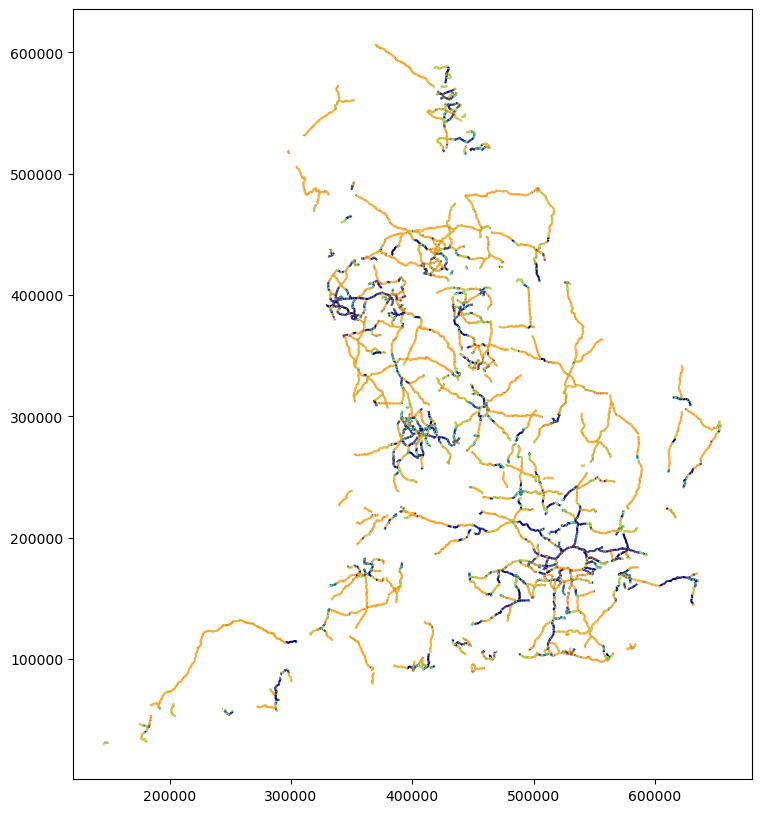

In [15]:
road_network_gdf.plot(cmap = 'jet', column = 'formOfWay', figsize = (10,10))

### Road Network Data : Adding a background map ( leveraging contextily )
adding web map tiles (Web Mercator-EPSG 3857) to this plot 

#### Basemap tilesets from different providers
By default contextily returns maptiles from the OpenStreetmap Mapnik basemap. However, there are other available tilesets from different providers. These tilesets are stored in the contextily cx.providers dictionary

In [16]:
display(cx.providers.keys())
display(cx.providers.OpenStreetMap.keys())
display(cx.providers.Esri.keys())
display(cx.providers.Stamen.keys())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas', 'ArcticImagery', 'ArcticOceanBase', 'ArcticOceanReference', 'AntarcticImagery', 'AntarcticBasemap'])

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])

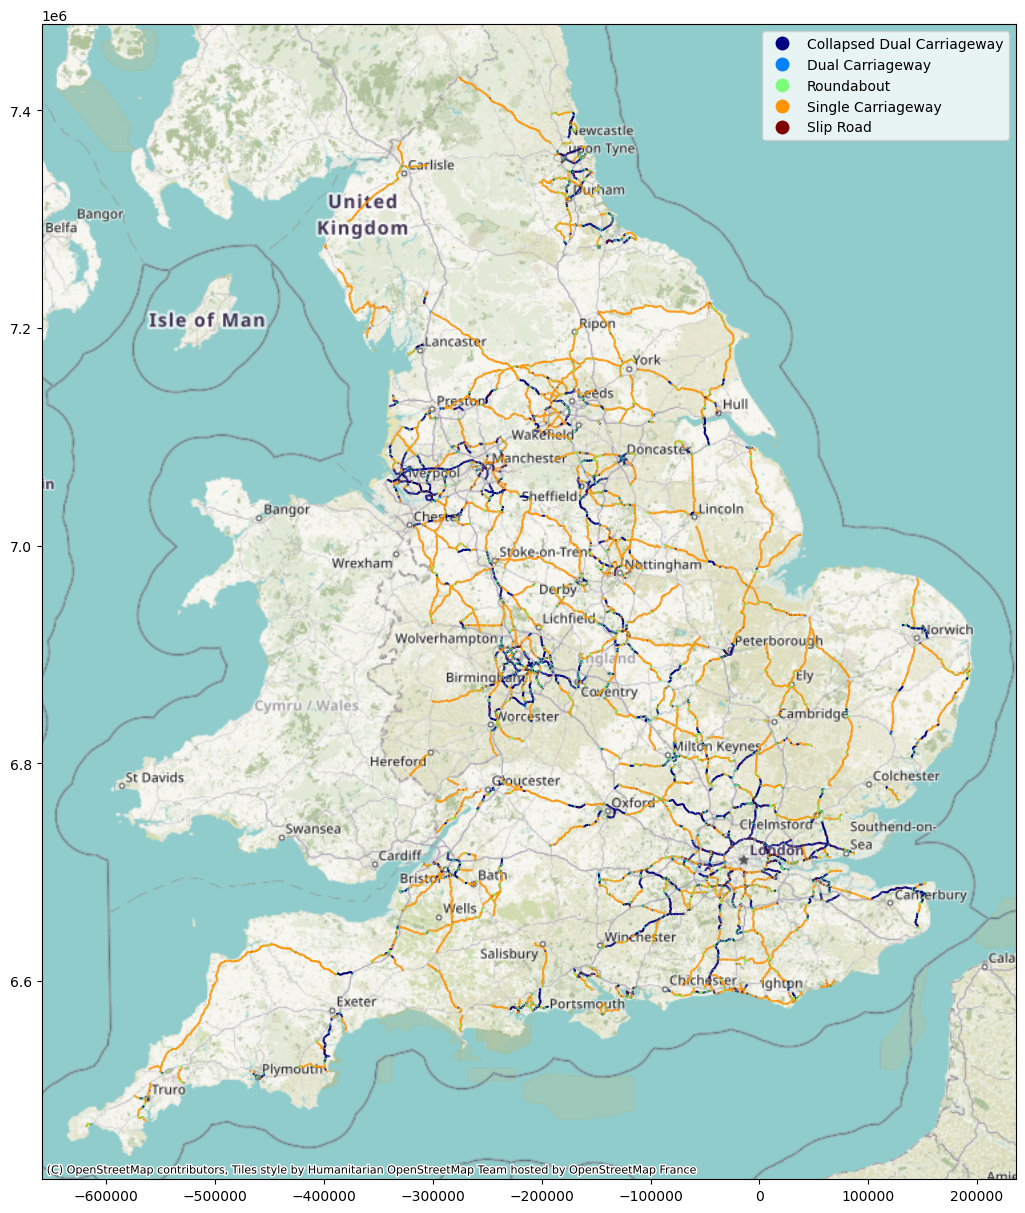

In [17]:
road_network_gdf_wm = road_network_gdf.to_crs(epsg=3857)
axis = road_network_gdf_wm.plot(cmap = 'jet', column = 'formOfWay', figsize = (15,15), legend=True)
cx.add_basemap(axis, source=cx.providers.OpenStreetMap.HOT)

## Combining Accident Point Map Layer And Road Network Line Map Layer

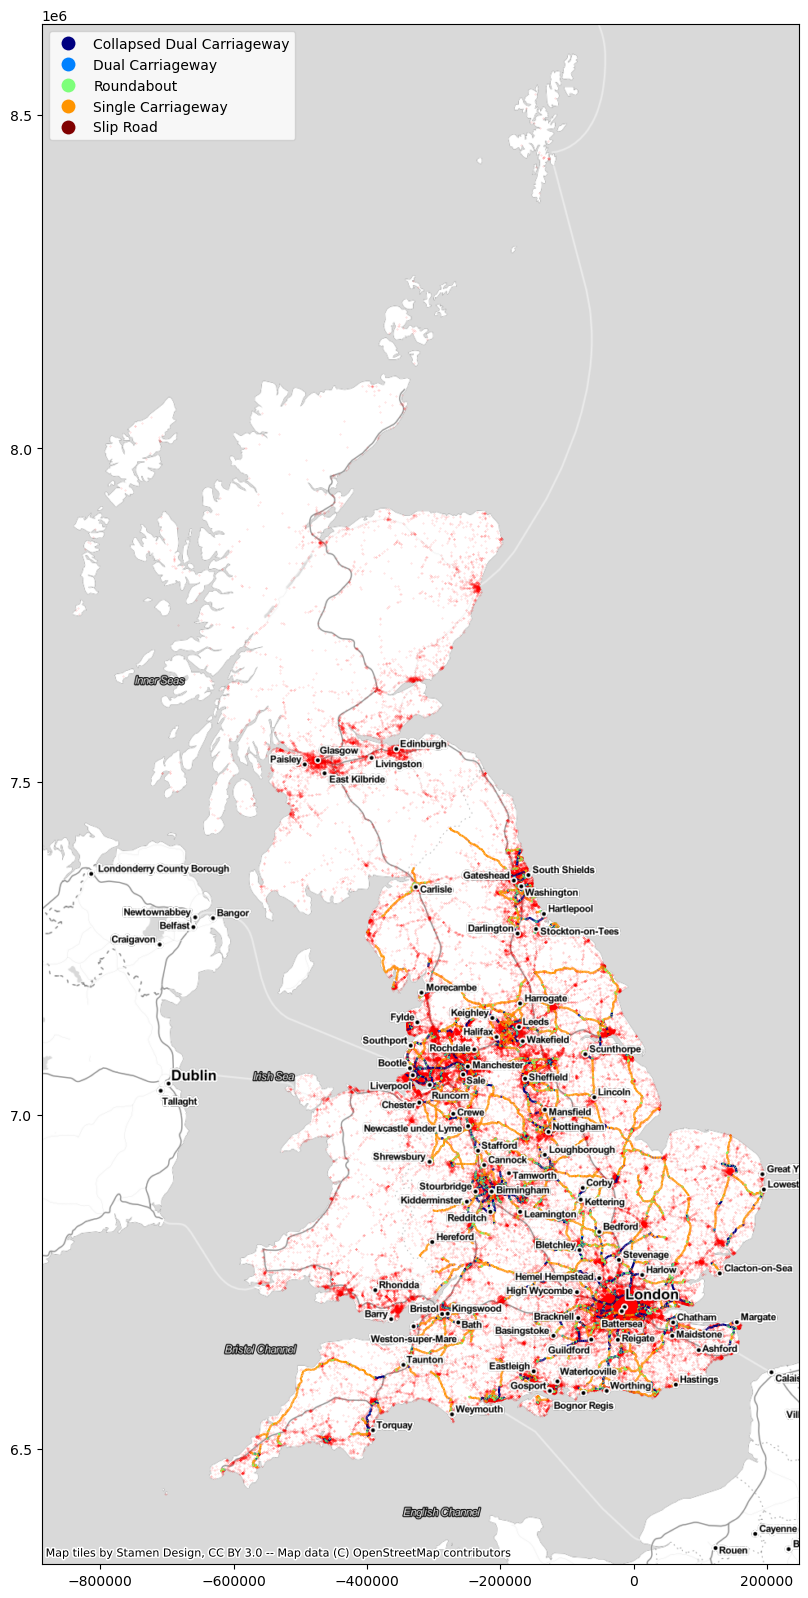

In [18]:
base_axes_accident_data = accident_data_gdf_wm.plot(zorder=1, figsize = (20,20), alpha=0.2, marker='o', color='red', markersize=0.1)
axis = road_network_gdf_wm.plot(zorder=2, ax = base_axes_accident_data, cmap = 'jet', column = 'formOfWay', figsize = (20,20), legend=True)
cx.add_basemap(axis, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(axis, source=cx.providers.Stamen.TonerLabels)